<a href="https://colab.research.google.com/github/Rozyyev23/Internship-in-VenueX/blob/main/Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('/content/drive/MyDrive/Internship/AAPL.csv')

Mounted at /content/drive


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700



**Difference between open and close stock prices**

In [ ]:


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Open'],
    name = 'Open', # Style name/legend entry with html tags
    connectgaps=True # override default to connect the gaps
))
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Close'],
    name='Close',
))

fig.show()

**According to the plot, stock prices of Apple Company stabely rises through years.**



In [ ]:


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['High'],
    name = 'High', # Style name/legend entry with html tags
    connectgaps=True # override default to connect the gaps
))
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Low'],
    name='Low',
))

fig.show()

In [ ]:


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Volume'],
    name = 'Volume', # Style name/legend entry with html tags
    connectgaps=True # override default to connect the gaps
))

fig.show()

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        df[column_name] = df['Adj Close'].rolling(ma).mean()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['MA for 10 days'],
    name = 'MA for 10 days', # Style name/legend entry with html tags
    connectgaps=True # override default to connect the gaps
))
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['MA for 20 days'],
    name='MA for 20 days',
))
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['MA for 50 days'],
    name='MA for 50 days',
))
fig.show()

In [ ]:
 df['Daily Return'] = df['Adj Close'].pct_change()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Daily Return'],
    name = 'Daily Return', # Style name/legend entry with html tags
    connectgaps=True # override default to connect the gaps
))
fig.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

9889

In [ ]:


scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[4.35483696e-04],
       [3.98684579e-04],
       [3.49613594e-04],
       ...,
       [9.27511961e-01],
       [9.35150965e-01],
       [9.56364315e-01]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00043548, 0.00039868, 0.00034961, 0.00036495, 0.00038335,
       0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0.00047229, 0.00051215, 0.00050602,
       0.00047842, 0.00048149, 0.00049682, 0.00049069, 0.00053669,
       0.00051215, 0.00052749, 0.00053669, 0.00053362, 0.00052135,
       0.00051522, 0.00049069, 0.00046309, 0.00042322, 0.00038335,
       0.00040788, 0.00043242, 0.00043242, 0.00043548, 0.00039868,
       0.00039868, 0.00037722, 0.00037108, 0.00035575, 0.00037108,
       0.00039868, 0.00035881, 0.00032508, 0.00033428, 0.00031281,
       0.00034961, 0.00035881, 0.00038029, 0.00038335, 0.00037415,
       0.00036801, 0.00036495, 0.00035881, 0.00030975, 0.00028214])]
[0.0002606768988729051]

[array([0.00043548, 0.00039868, 0.00034961, 0.00036495, 0.00038335,
       0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00043548, 0.00039868, 0.00034961, 0.00036495, 0.00038335,
       0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0.00047229, 0.00051215, 0.00050602,
       0.00047842, 0.00048149, 0.00049682, 0.00049069, 0.00053669,
       0.00051215, 0.00052749, 0.00053669, 0.00053362, 0.00052135,
       0.00051522, 0.00049069, 0.00046309, 0.00042322, 0.00038335,
       0.00040788, 0.00043242, 0.00043242, 0.00043548, 0.00039868,
       0.00039868, 0.00037722, 0.00037108, 0.00035575, 0.00037108,
       0.00039868, 0.00035881, 0.00032508, 0.00033428, 0.00031281,
       0.00034961, 0.00035881, 0.00038029, 0.00038335, 0.00037415,
       0.00036801, 0.00036495, 0.00035881, 0.00030975, 0.00028214])]
[0.0002606768988729051]

[array([0.00043548, 0.00039868, 0.00034961, 0.00036495, 0.00038335,
       0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.

In [ ]:


# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

9829/9829 [==============================] - 326s 33ms/step - loss: 2.0271e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.927131436789523

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



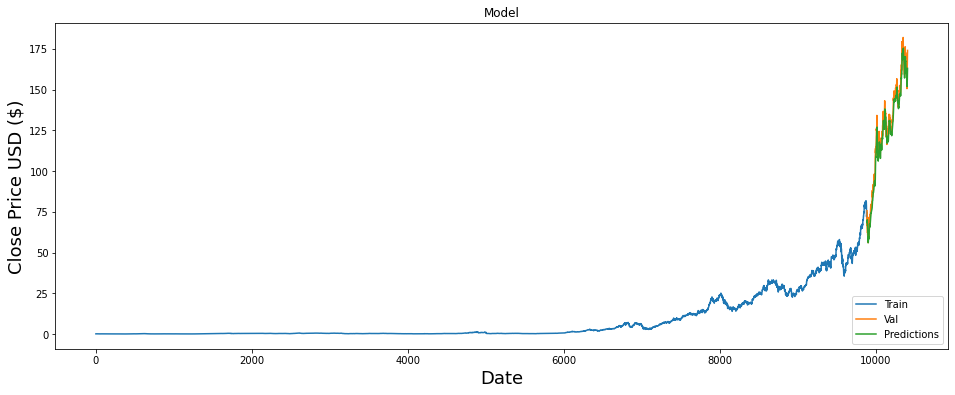

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
9889,75.684998,68.436890
9890,73.230003,69.607063
9891,72.257500,70.141693
9892,66.542503,70.087410
9893,71.334999,68.421707
...,...,...
10404,163.979996,154.104492
10405,165.380005,156.212982
10406,168.820007,158.350693
10407,170.210007,160.795120


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800,NaN,NaN,NaN,-0.052171
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000,NaN,NaN,NaN,-0.073394
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600,NaN,NaN,NaN,0.024753
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600,NaN,NaN,NaN,0.028984
...,...,...,...,...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200,158.283998,161.3200,166.501283,0.020919
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400,158.891998,161.2240,166.373260,0.008538
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000,160.029999,161.4490,166.310641,0.020801
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700,160.756000,161.9560,166.275424,0.008234
